### The data collection script
```javascript
    setInterval(() => {
        const dvd = document.getElementById('dvd');
        if (dvd) {
        const rect = dvd.getBoundingClientRect();
        console.log(${rect.x},${rect.y});
        }
    }, 10);
```

#### Method
We went to the dvd screensaver [website](https://www.bouncingdvdlogo.com) and marked the html div that moves arond with a "dvd" id and ran the above script in the console. The script logs the position of the element with id 'dvd' every 10 milliseconds. We then copied the logged data and saved it to a csv file.

### Initial plot of the data we gathered

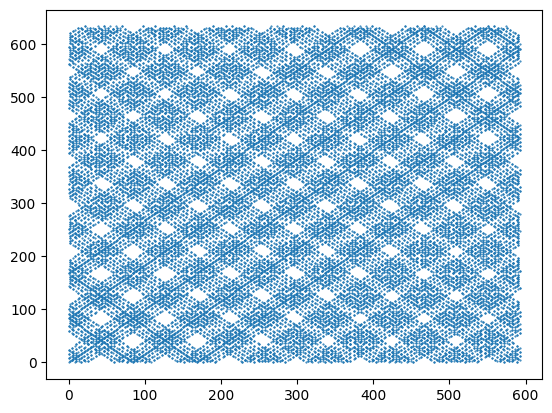

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('985x812_394x180.csv')

# Plot the data
plt.plot(data['x'], data['y'], 'o', markersize=0.5)

plt.show()

### First we cleaned the collected data

In [2]:
import pandas as pd

# Read data from csv file
data = pd.read_csv('985x812_394x180.csv')

# Add timestamps to the data
data['t'] = data.index * 0.01

# Round time to 3 decimals
data['t'] = data['t'].round(3)

# Prune rows where x and y is equal to the row after,
# we got a lot of points in the data that have the same x and y values
data = data[(data['x'] != data['x'].shift(1)) | (data['y'] != data['y'].shift(1))]

# Calculate the speeds dx and dy
data['dx'] = data['x'].diff() * data['t'].diff()
data['dy'] = data['y'].diff() * data['t'].diff()

# Round speeds to 3 decimals
data['dx'] = data['dx'].round(3)
data['dy'] = data['dy'].round(3)

# Save the cleaned data to a new csv file
data.to_csv('985x812_394x180_cleaned.csv', index=False)

### Plot the x and y speeds as a function of time

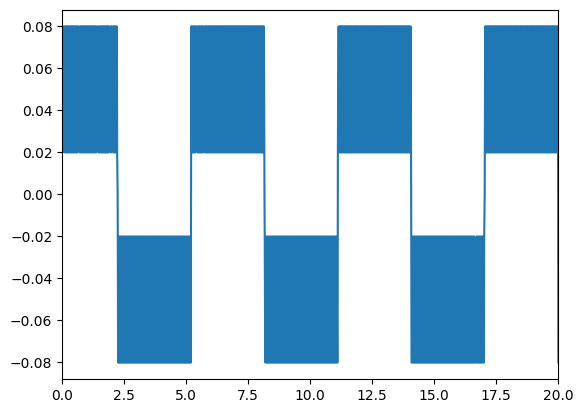

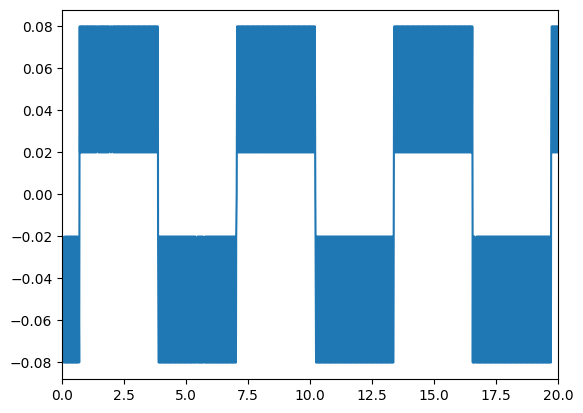

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the cleaned data from the CSV file
data = pd.read_csv('985x812_394x180_cleaned.csv')

# Plot the x speed
plt.plot(data['t'], data['dx'])

# scale x axis of the plot to fit 0-20
plt.xlim(0, 20)

plt.show()

# Plot the y speed
plt.plot(data['t'], data['dy'])

# scale x axis of the plot to fit 0-20
plt.xlim(0, 20)

plt.show()


### Plot the spots where velocity changes direction

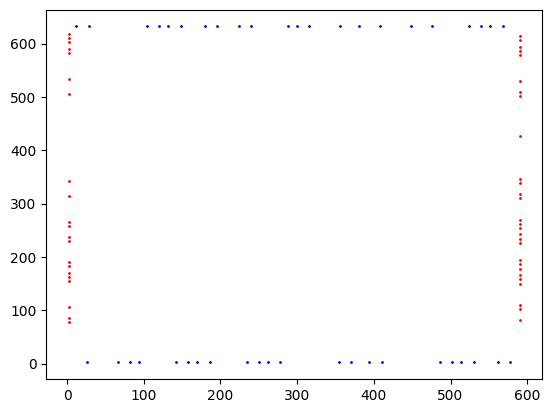

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the cleaned data from the CSV file
data = pd.read_csv('985x812_394x180_cleaned.csv')

# Get the x and y values where the spped in x or y is 0
data_zero_x_speed = data[(data['dx'] == 0)]
data_zero_y_speed = data[(data['dy'] == 0)]

# Plot the x and y values where the speed in x or y is 0
plt.plot(data_zero_x_speed['x'], data_zero_x_speed['y'], 'o', markersize=1, color='red')
plt.plot(data_zero_y_speed['x'], data_zero_y_speed['y'], 'o', markersize=1, color='blue')

plt.show()

### Creating a model to predict the next position of the dvd logo

Despite the cleaning of the data we have some incosistencies in the speed of the dvd logo, we think this is the result of the unreliablity of our collection method rooted the fact we have to console log the data through the browser terminal. However the speed isnt the most important factor in understanding how the dvd logo bounces.